# MLOps con MLflow

#### Get data

In [1]:
import mlflow

# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


#### Preprocessing

In [2]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', 
          transform_target = True, 
          log_experiment = True, 
          log_plots = True,
          experiment_name = 'diamond')

,Description,Value
0,Session id,728
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


2025/02/03 09:36:06 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.


#### Model Training

In [3]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,620.7569,1611421.1137,1256.4780,0.9843,0.0665,0.0488,0.3700
et,Extra Trees Regressor,740.6709,2029108.2516,1415.1885,0.9805,0.0800,0.0590,0.0930
rf,Random Forest Regressor,720.8268,2093325.3168,1433.9470,0.9799,0.0777,0.0570,0.0790
gbr,Gradient Boosting Regressor,746.4032,2367807.2986,1513.0693,0.9773,0.0769,0.0571,0.0350
dt,Decision Tree Regressor,938.8555,3465996.1754,1845.7615,0.9674,0.1013,0.0742,0.0110
ada,AdaBoost Regressor,2016.8002,18033867.3807,4164.3681,0.8338,0.1893,0.1515,0.0280
knn,K Neighbors Regressor,3054.5050,35787565.7970,5955.7311,0.6573,0.3629,0.2311,0.0150
omp,Orthogonal Matching Pursuit,3328.1021,75506439.5999,8532.3641,0.2609,0.2822,0.2215,0.0110
lasso,Lasso Regression,6625.9484,117859842.7124,10816.1805,-0.1246,0.7145,0.5652,0.1560
en,Elastic Net,6625.9484,117859842.7124,10816.1805,-0.1246,0.7145,0.5652,0.0130


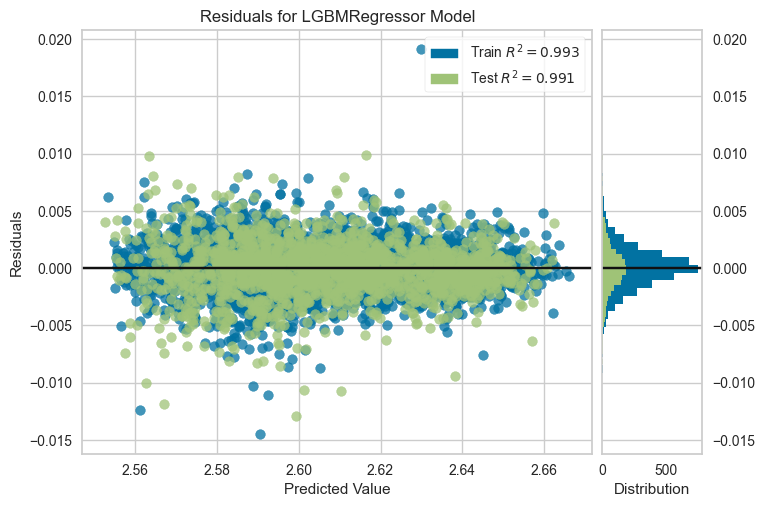

In [4]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

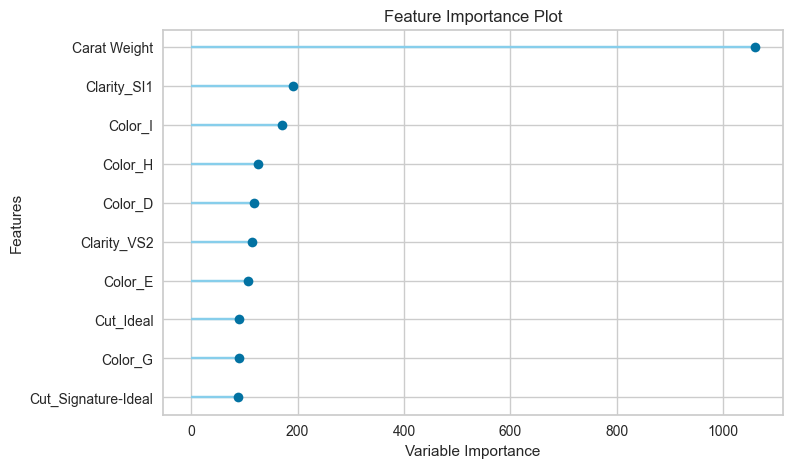

In [5]:
# check feature importance
plot_model(best, plot = 'feature')

In [6]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                        

### Model management with MLFlow

### Consume the model

In [7]:
# alternative if you are saving your artifact locally

pipeline = load_model('diamond-pipeline')


Transformation Pipeline and Model Successfully Loaded


In [8]:
# print pipeline
print(pipeline)

Pipeline(memory=FastMemory(location=/var/folders/jc/mky5brlx03z7bnn4kgbmdqhm0000gp/T/joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer'...
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                           

In [9]:
# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)

In [10]:
# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5421.280172
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3569.891342
2,0.85,Ideal,H,SI1,EX,EX,GIA,3341.587732
3,0.91,Ideal,E,SI1,VG,VG,GIA,4531.185124
4,0.83,Ideal,G,SI1,EX,EX,GIA,3256.250454


In [11]:
# # Register the model in MLflow Model Registry
# with mlflow.start_run(): # Make sure you are within an active run (or start a new one)
#     mlflow.sklearn.log_model(
#         sk_model=final_best,
#         artifact_path="model", # Same artifact path as before (or different if you want)
#         registered_model_name="diamond-pipeline" # This registers it in the Model Registry
#     )